In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
import missingno


In [2]:
data_path="C:\\Users\\semih\\Desktop\\tez\\marketing_campaign.csv"
data=pd.read_csv(data_path, sep="\t")


In [3]:
data.head(6)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  

[6 rows x 29 columns]

In [4]:
data.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# VERİ ÖN İŞLEMEDEN ÖNCE VERİ GÖRÜNTÜLEME

In [6]:
fig=px.box(data,x='MntWines',title='MntWines',color_discrete_sequence=["#7A1012"])
fig.show()


In [7]:
plt.hist(data["MntWines"], color=["#7A1012"], edgecolor='black')
plt.xlabel('MntWines')
plt.ylabel('Frequency')
plt.title('MntWines Distrubition') 
plt.show()


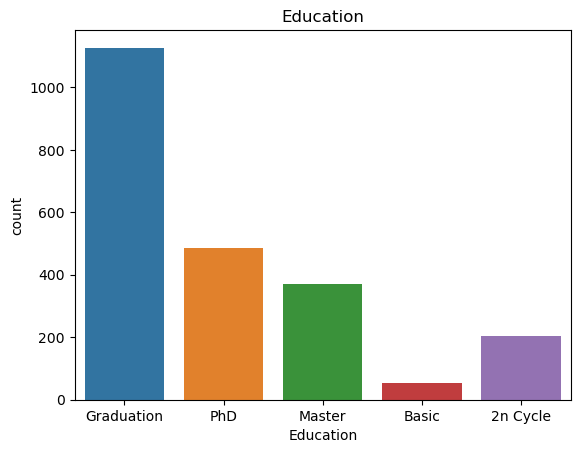

In [8]:
sns.countplot(x=data['Education'],data=data) 
plt.title('Education')
plt.show ()


In [9]:
education_counts = data["Education"].value_counts()

education_counts_df = pd.DataFrame({
    'Education Level': education_counts.index,
    'Count': education_counts.values
})

fig = px.pie(education_counts_df, names='Education Level', values='Count', title='Education Level Distribution')
fig.show()


In [10]:
plt.hist(data["Year_Birth"], color=["#FF5733"], edgecolor='black')
plt.xlabel('Year_Birth')
plt.ylabel('Frequency')
plt.title('Year_Birth Distrubition')
plt.show()


In [11]:
sns.countplot(x=data["Marital_Status"],data=data)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status")
plt.show()


In [12]:
marital_counts = data["Marital_Status"].value_counts()

marital_counts_df = pd.DataFrame({
    'Marital Status Level': marital_counts.index,
    'Count': marital_counts.values})

fig = px.pie(marital_counts_df, names='Marital Status Level', values='Count', title='Marital Status Level Distribution')
fig.show()


In [13]:
fig=px.box(data,x='Income',title='IncomeBoxPlot',color_discrete_sequence=["#012647"])
fig.show()


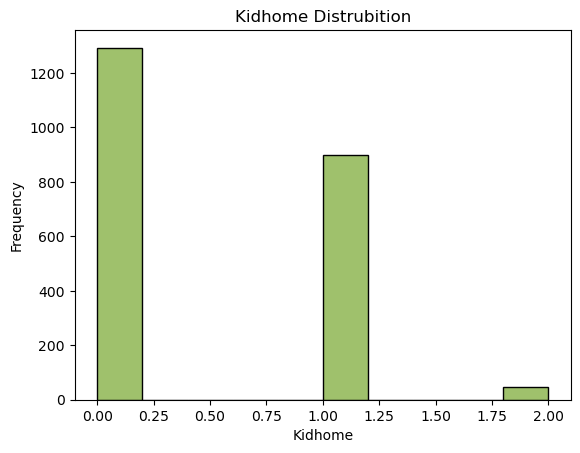

In [14]:
plt.hist(data["Kidhome"], color=["#9fc16c"], edgecolor='black')
plt.xlabel('Kidhome')
plt.ylabel('Frequency')
plt.title('Kidhome Distrubition')
plt.show()


In [15]:
plt.hist(data["Teenhome"], color=["#00629B"], edgecolor='black')
plt.xlabel('Teenhome')
plt.ylabel('Frequency')
plt.title('Teenhome Distribution')
plt.show()



In [16]:
Dt_Customer_count=data["Dt_Customer"].value_counts()
plt.figure(figsize=(20,6))
fig=px.bar(Dt_Customer_count, title="Date of Customer Enrolled")
fig.show()


<Figure size 2000x600 with 0 Axes>

In [17]:
fig=px.box(data,x='Recency',title='RecencyBoxplot',color_discrete_sequence=["#31829f"])
fig.show()


In [18]:
complain_counts = data["Complain"].value_counts()
complain_counts_df = pd.DataFrame({
    'Complain Status Level': complain_counts.index,
    'Count': complain_counts.values})
fig = px.pie(complain_counts_df, names='Complain Status Level', values='Count', title='Complain Status Level Distribution')

fig.show()


In [19]:
cmp1_counts = data["AcceptedCmp1"].value_counts()
cmp1_counts_df = pd.DataFrame({
    'AcceptedCmp1 Level': cmp1_counts.index,
    'Count': cmp1_counts.values})
fig = px.pie(cmp1_counts_df, names='AcceptedCmp1 Level', values='Count', title='AcceptedCmp1 Level Distribution')
fig.show()


In [20]:
cmp2_counts = data["AcceptedCmp2"].value_counts()
cmp2_counts_df = pd.DataFrame({
    'AcceptedCmp2 Level': cmp2_counts.index,
    'Count': cmp2_counts.values})
fig = px.pie(cmp2_counts_df, names='AcceptedCmp2 Level', values='Count', title='AcceptedCmp2 Level Distribution')

fig.show()


In [21]:
cmp3_counts = data["AcceptedCmp3"].value_counts()
cmp3_counts_df = pd.DataFrame({
    'AcceptedCmp3 Level': cmp3_counts.index,
    'Count': cmp3_counts.values})
fig = px.pie(cmp3_counts_df, names='AcceptedCmp3 Level', values='Count', title='AcceptedCmp3 Level Distribution')
fig.show()


In [22]:
cmp4_counts = data["AcceptedCmp4"].value_counts()
cmp4_counts_df = pd.DataFrame({
    'AcceptedCmp4 Level': cmp4_counts.index,
    'Count': cmp4_counts.values})
fig = px.pie(cmp4_counts_df, names='AcceptedCmp4 Level', values='Count', title='AcceptedCmp4 Level Distribution')
fig.show()


In [23]:
cmp5_counts = data["AcceptedCmp5"].value_counts()
cmp5_counts_df = pd.DataFrame({
    'AcceptedCmp5 Level': cmp5_counts.index,
    'Count': cmp5_counts.values})
fig = px.pie(cmp5_counts_df, names='AcceptedCmp5 Level', values='Count', title='AcceptedCmp5 Level Distribution')
fig.show()


In [24]:
response_counts = data["Response"].value_counts()
response_counts_df = pd.DataFrame({
    'Response Status Level': response_counts.index,
    'Count': response_counts.values})
fig = px.pie(response_counts_df, names='Response Status Level', values='Count', title='Response Status Level Distribution')
fig.show()


In [25]:
plt.hist(data["NumWebPurchases"], color=["#00A36C"], edgecolor='black')
plt.xlabel('NumWebPurchases')
plt.ylabel('Frequency')
plt.title('NumWebPurchases Distribution')
plt.show()


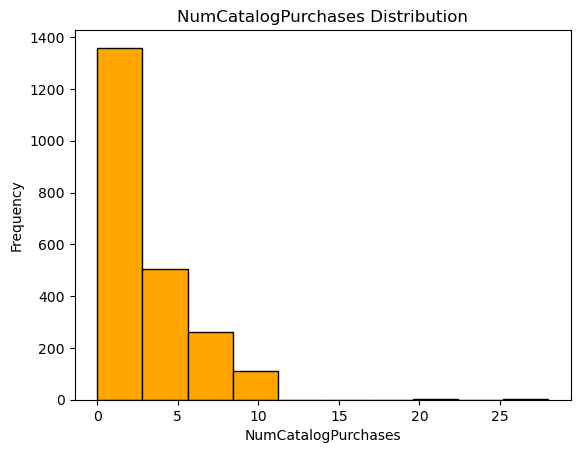

In [26]:
plt.hist(data["NumCatalogPurchases"], color=["#FFA500"], edgecolor='black')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Frequency')
plt.title('NumCatalogPurchases Distribution')
plt.show()


In [27]:
plt.hist(data["NumStorePurchases"], color=["#B06500"], edgecolor='black')
plt.xlabel('NumStorePurchases')
plt.ylabel('Frequency')
plt.title('NumStorePurchases Distribution')
plt.show()


In [28]:
plt.hist(data["NumWebVisitsMonth"], color=["#800080"], edgecolor='black')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Frequency')
plt.title('NumWebVisitsMonth')
plt.show()


In [29]:
plt.hist(data["MntFruits"], color=["#900033"], edgecolor='black')
plt.xlabel('MntFruits')
plt.ylabel('Frequency')
plt.title('MntFruits')
plt.show()


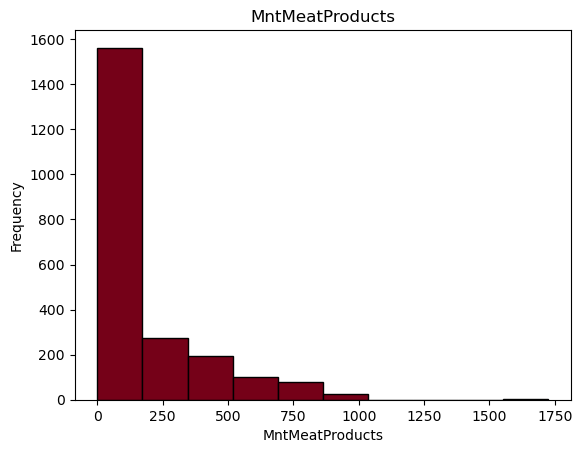

In [30]:
plt.hist(data["MntMeatProducts"], color=["#750118"], edgecolor='black')
plt.xlabel('MntMeatProducts')
plt.ylabel('Frequency')
plt.title('MntMeatProducts')
plt.show()


In [31]:
fig=px.box(data, x='MntFishProducts',
 title='MntFishProducts', color_discrete_sequence=["#316A63"])
fig.show()


In [32]:
fig=px.box(data, x='MntSweetProducts', 
title='MntSweetProducts', color_discrete_sequence=["#444B44"])
fig.show()


In [33]:
fig=px.box(data, x='MntGoldProds', 
title='MntGoldProds', color_discrete_sequence=["#B06500"])
fig.show()


# Veri Ön İşleme - Data Preprocessing

In [34]:
duplicated_rows = data.loc[:,data.columns.difference(["ID"])].duplicated(keep=False)
if duplicated_rows.any():
    display("Duplicated rows:")
    display(data[duplicated_rows].sort_values(by=['Year_Birth'], ascending = False).head(6))
    display(f"Number of Data Duplicated: {duplicated_rows.sum()}")
    
    data = data.drop_duplicates(subset=data.columns.difference(["ID"]), keep="first")
else:
    display("No duplicated rows.")


'Duplicated rows:'

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
696    8315        1995  Graduation         Single  34824.0        0   
995    5184        1995  Graduation         Single  34824.0        0   
392    2669        1993  Graduation         Single  74293.0        0   
928   10037        1993  Graduation         Single  74293.0        0   
1578   8175        1992  Graduation        Married  34935.0        0   
508    3386        1992  Graduation        Married  34935.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
696          0  26-03-2014       65         4  ...                  6   
995          0  26-03-2014       65         4  ...                  6   
392          0  04-05-2014       66       375  ...                  2   
928          0  04-05-2014       66       375  ...                  2   
1578         0  21-06-2013       71        34  ...                  7   
508          0  21-06-2013       71        34  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
696              0             0             0             0             0   
995              0             0             0             0             0   
392              0             0             0             0             0   
928              0             0             0             0             0   
1578             0             0             0             0             0   
508              0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
696          0              3         11         0  
995          0              3         11         0  
392          0              3         11         0  
928          0              3         11         0  
1578         0              3         11         0  
508          0              3         11         0  

[6 rows x 29 columns]

'Number of Data Duplicated: 358'

# Missing Value

In [35]:
Q3_value = data['Income'].quantile(0.75)
data['Income'].fillna(Q3_value, inplace=True)


# Noisy Data

In [36]:
del data["Z_CostContact"]
del data["Z_Revenue"]


# Preprocessing of Historical Data

In [37]:
import datetime

In [38]:
current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year_Birth']


In [39]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
current_year = pd.Timestamp.now().year


In [40]:
data['Enrollment_Year'] = current_year - data['Dt_Customer'].dt.year

In [41]:
data['Enrollment_Year']

0       12
1       10
2       11
3       10
4       10
        ..
2233    11
2235    11
2237    10
2238    10
2239    12
Name: Enrollment_Year, Length: 2058, dtype: int32

In [42]:
fig=px.box(data, x='Enrollment_Year', title='Enrollment _Year')
fig.show()


# Outlier Detection

In [43]:
def replace_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))





In [44]:
replace_outliers(data, 'Income')

fig=px.box(data, x='Income', title='Income')
fig.show()

In [45]:
replace_outliers(data, 'Year_Birth')
fig=px.box(data, x='Year_Birth', title='Year_Birth')
fig.show()


In [46]:
replace_outliers(data, 'MntWines')
fig=px.box(data, x='MntWines', title='MntWines')
fig.show()

In [47]:

fig=px.box(data, x='MntMeatProducts', title='MntMeatProducts')
fig.show()


In [48]:
replace_outliers(data, 'MntMeatProducts')
fig=px.box(data, x='MntMeatProducts', title='MntMeatProducts')
fig.show()


In [49]:
replace_outliers(data, 'MntFruits')
fig=px.box(data, x='MntFruits', title='MntFruits')
fig.show()


In [50]:
replace_outliers(data, 'MntFishProducts')
fig=px.box(data, x='MntFishProducts', title='MntFishProducts')
fig.show()

In [51]:
replace_outliers(data, 'MntSweetProducts')
fig=px.box(data, x='MntSweetProducts', title='MntSweetProducts')
fig.show()

In [52]:
replace_outliers(data, 'MntGoldProds')
fig=px.box(data, x='MntGoldProds', title='MntGoldProds')
fig.show()

In [53]:
replace_outliers(data, 'Age')
fig=px.box(data, x='Age', title='Age')
fig.show()


In [54]:
replace_outliers(data, 'NumDealsPurchases')
fig=px.box(data, x='NumDealsPurchases', title='NumDealsPurchases')
fig.show()

In [55]:
replace_outliers(data, 'NumWebPurchases')
fig=px.box(data, x='NumWebPurchases', title='NumWebPurchases')
fig.show()

In [56]:
replace_outliers(data, 'NumCatalogPurchases')
fig=px.box(data, x='NumCatalogPurchases', title='NumCatalogPurchases')
fig.show()

In [57]:
replace_outliers(data, 'NumWebVisitsMonth')
fig=px.box(data, x='NumWebVisitsMonth', title='NumWebVisitsMonth')
fig.show()

# Data Transformation -Normalization 

In [58]:
dummy_education = pd.get_dummies(data['Education'], prefix='Edu')
dummy_marital_status = pd.get_dummies(data['Marital_Status'], prefix='Marital')
data = pd.concat([data, dummy_education, dummy_marital_status], axis=1)


In [59]:
data =data.replace({True:1,False:0})

In [60]:
data

ID  Year_Birth   Education Marital_Status     Income  Kidhome  \
0      5524      1957.0  Graduation         Single   58138.00        0   
1      2174      1954.0  Graduation         Single   46344.00        1   
2      4141      1965.0  Graduation       Together   71613.00        0   
3      6182      1984.0  Graduation       Together   26646.00        1   
4      5324      1981.0         PhD        Married   58293.00        1   
...     ...         ...         ...            ...        ...      ...   
2233   9432      1977.0  Graduation       Together  117649.25        1   
2235  10870      1967.0  Graduation        Married   61223.00        0   
2237   7270      1981.0  Graduation       Divorced   56981.00        0   
2238   8235      1956.0      Master       Together   69245.00        0   
2239   9405      1954.0         PhD        Married   52869.00        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Edu_Master  Edu_PhD  \
0            0  2012-09-04       58     635.0  ...           0        0   
1            1  2014-03-08       38      11.0  ...           0        0   
2            0  2013-08-21       26     426.0  ...           0        0   
3            0  2014-02-10       26      11.0  ...           0        0   
4            0  2014-01-19       94     173.0  ...           0        1   
...        ...         ...      ...       ...  ...         ...      ...   
2233         0  2013-06-02       23       9.0  ...           0        0   
2235         1  2013-06-13       46     709.0  ...           0        0   
2237         0  2014-01-25       91     908.0  ...           0        0   
2238         1  2014-01-24        8     428.0  ...           1        0   
2239         1  2012-10-15       40      84.0  ...           0        1   

      Marital_Absurd  Marital_Alone  Marital_Divorced  Marital_Married  \
0                  0              0                 0                0   
1                  0              0                 0                0   
2                  0              0                 0                0   
3                  0              0                 0                0   
4                  0              0                 0                1   
...              ...            ...               ...              ...   
2233               0              0                 0                0   
2235               0              0                 0                1   
2237               0              0                 1                0   
2238               0              0                 0                0   
2239               0              0                 0                1   

      Marital_Single  Marital_Together  Marital_Widow  Marital_YOLO  
0                  1                 0              0             0  
1                  1                 0              0             0  
2                  0                 1              0             0  
3                  0                 1              0             0  
4                  0                 0              0             0  
...              ...               ...            ...           ...  
2233               0                 1              0             0  
2235               0                 0              0             0  
2237               0                 0              0             0  
2238               0                 1              0             0  
2239               0                 0              0             0  

[2058 rows x 42 columns]

In [61]:
normalization_columns=['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases','Recency','Enrollment_Year']
scaler = StandardScaler()
data[normalization_columns] = scaler.fit_transform(data[normalization_columns])


In [70]:
data_copy=data.copy()
dropped_dt=data_copy.drop(['Education','Marital_Status'],axis=1)




In [71]:
dropped_dt

ID  Year_Birth    Income  Kidhome  Teenhome Dt_Customer   Recency  \
0      5524      1957.0  0.285248        0         0  2012-09-04  0.312088   
1      2174      1954.0 -0.275801        1         1  2014-03-08 -0.377754   
2      4141      1965.0  0.926263        0         0  2013-08-21 -0.791659   
3      6182      1984.0 -1.212850        1         0  2014-02-10 -0.791659   
4      5324      1981.0  0.292621        1         0  2014-01-19  1.553804   
...     ...         ...       ...      ...       ...         ...       ...   
2233   9432      1977.0  3.116242        1         0  2013-06-02 -0.895135   
2235  10870      1967.0  0.432004        0         1  2013-06-13 -0.101817   
2237   7270      1981.0  0.230208        0         0  2014-01-25  1.450328   
2238   8235      1956.0  0.813616        0         1  2014-01-24 -1.412517   
2239   9405      1954.0  0.034598        1         1  2012-10-15 -0.308770   

      MntWines  MntFruits  MntMeatProducts  ...  Edu_Master  Edu_PhD  \
0     1.004720   2.185418         2.216715  ...           0        0   
1    -0.879122  -0.758103        -0.809548  ...           0        0   
2     0.373754   1.008009        -0.131441  ...           0        0   
3    -0.879122  -0.647721        -0.731089  ...           0        0   
4    -0.390047   0.787245        -0.181879  ...           0        1   
...        ...        ...              ...  ...         ...      ...   
2233 -0.885159  -0.279781        -0.742298  ...           0        0   
2235  1.228124   0.787245         0.176789  ...           0        0   
2237  1.828901   0.971215         0.372936  ...           0        0   
2238  0.379792   0.308923         0.356123  ...           1        0   
2239 -0.658736  -0.684515        -0.501318  ...           0        1   

      Marital_Absurd  Marital_Alone  Marital_Divorced  Marital_Married  \
0                  0              0                 0                0   
1                  0              0                 0                0   
2                  0              0                 0                0   
3                  0              0                 0                0   
4                  0              0                 0                1   
...              ...            ...               ...              ...   
2233               0              0                 0                0   
2235               0              0                 0                1   
2237               0              0                 1                0   
2238               0              0                 0                0   
2239               0              0                 0                1   

      Marital_Single  Marital_Together  Marital_Widow  Marital_YOLO  
0                  1                 0              0             0  
1                  1                 0              0             0  
2                  0                 1              0             0  
3                  0                 1              0             0  
4                  0                 0              0             0  
...              ...               ...            ...           ...  
2233               0                 1              0             0  
2235               0                 0              0             0  
2237               0                 0              0             0  
2238               0                 1              0             0  
2239               0                 0              0             0  

[2058 rows x 40 columns]

# Feature Selection

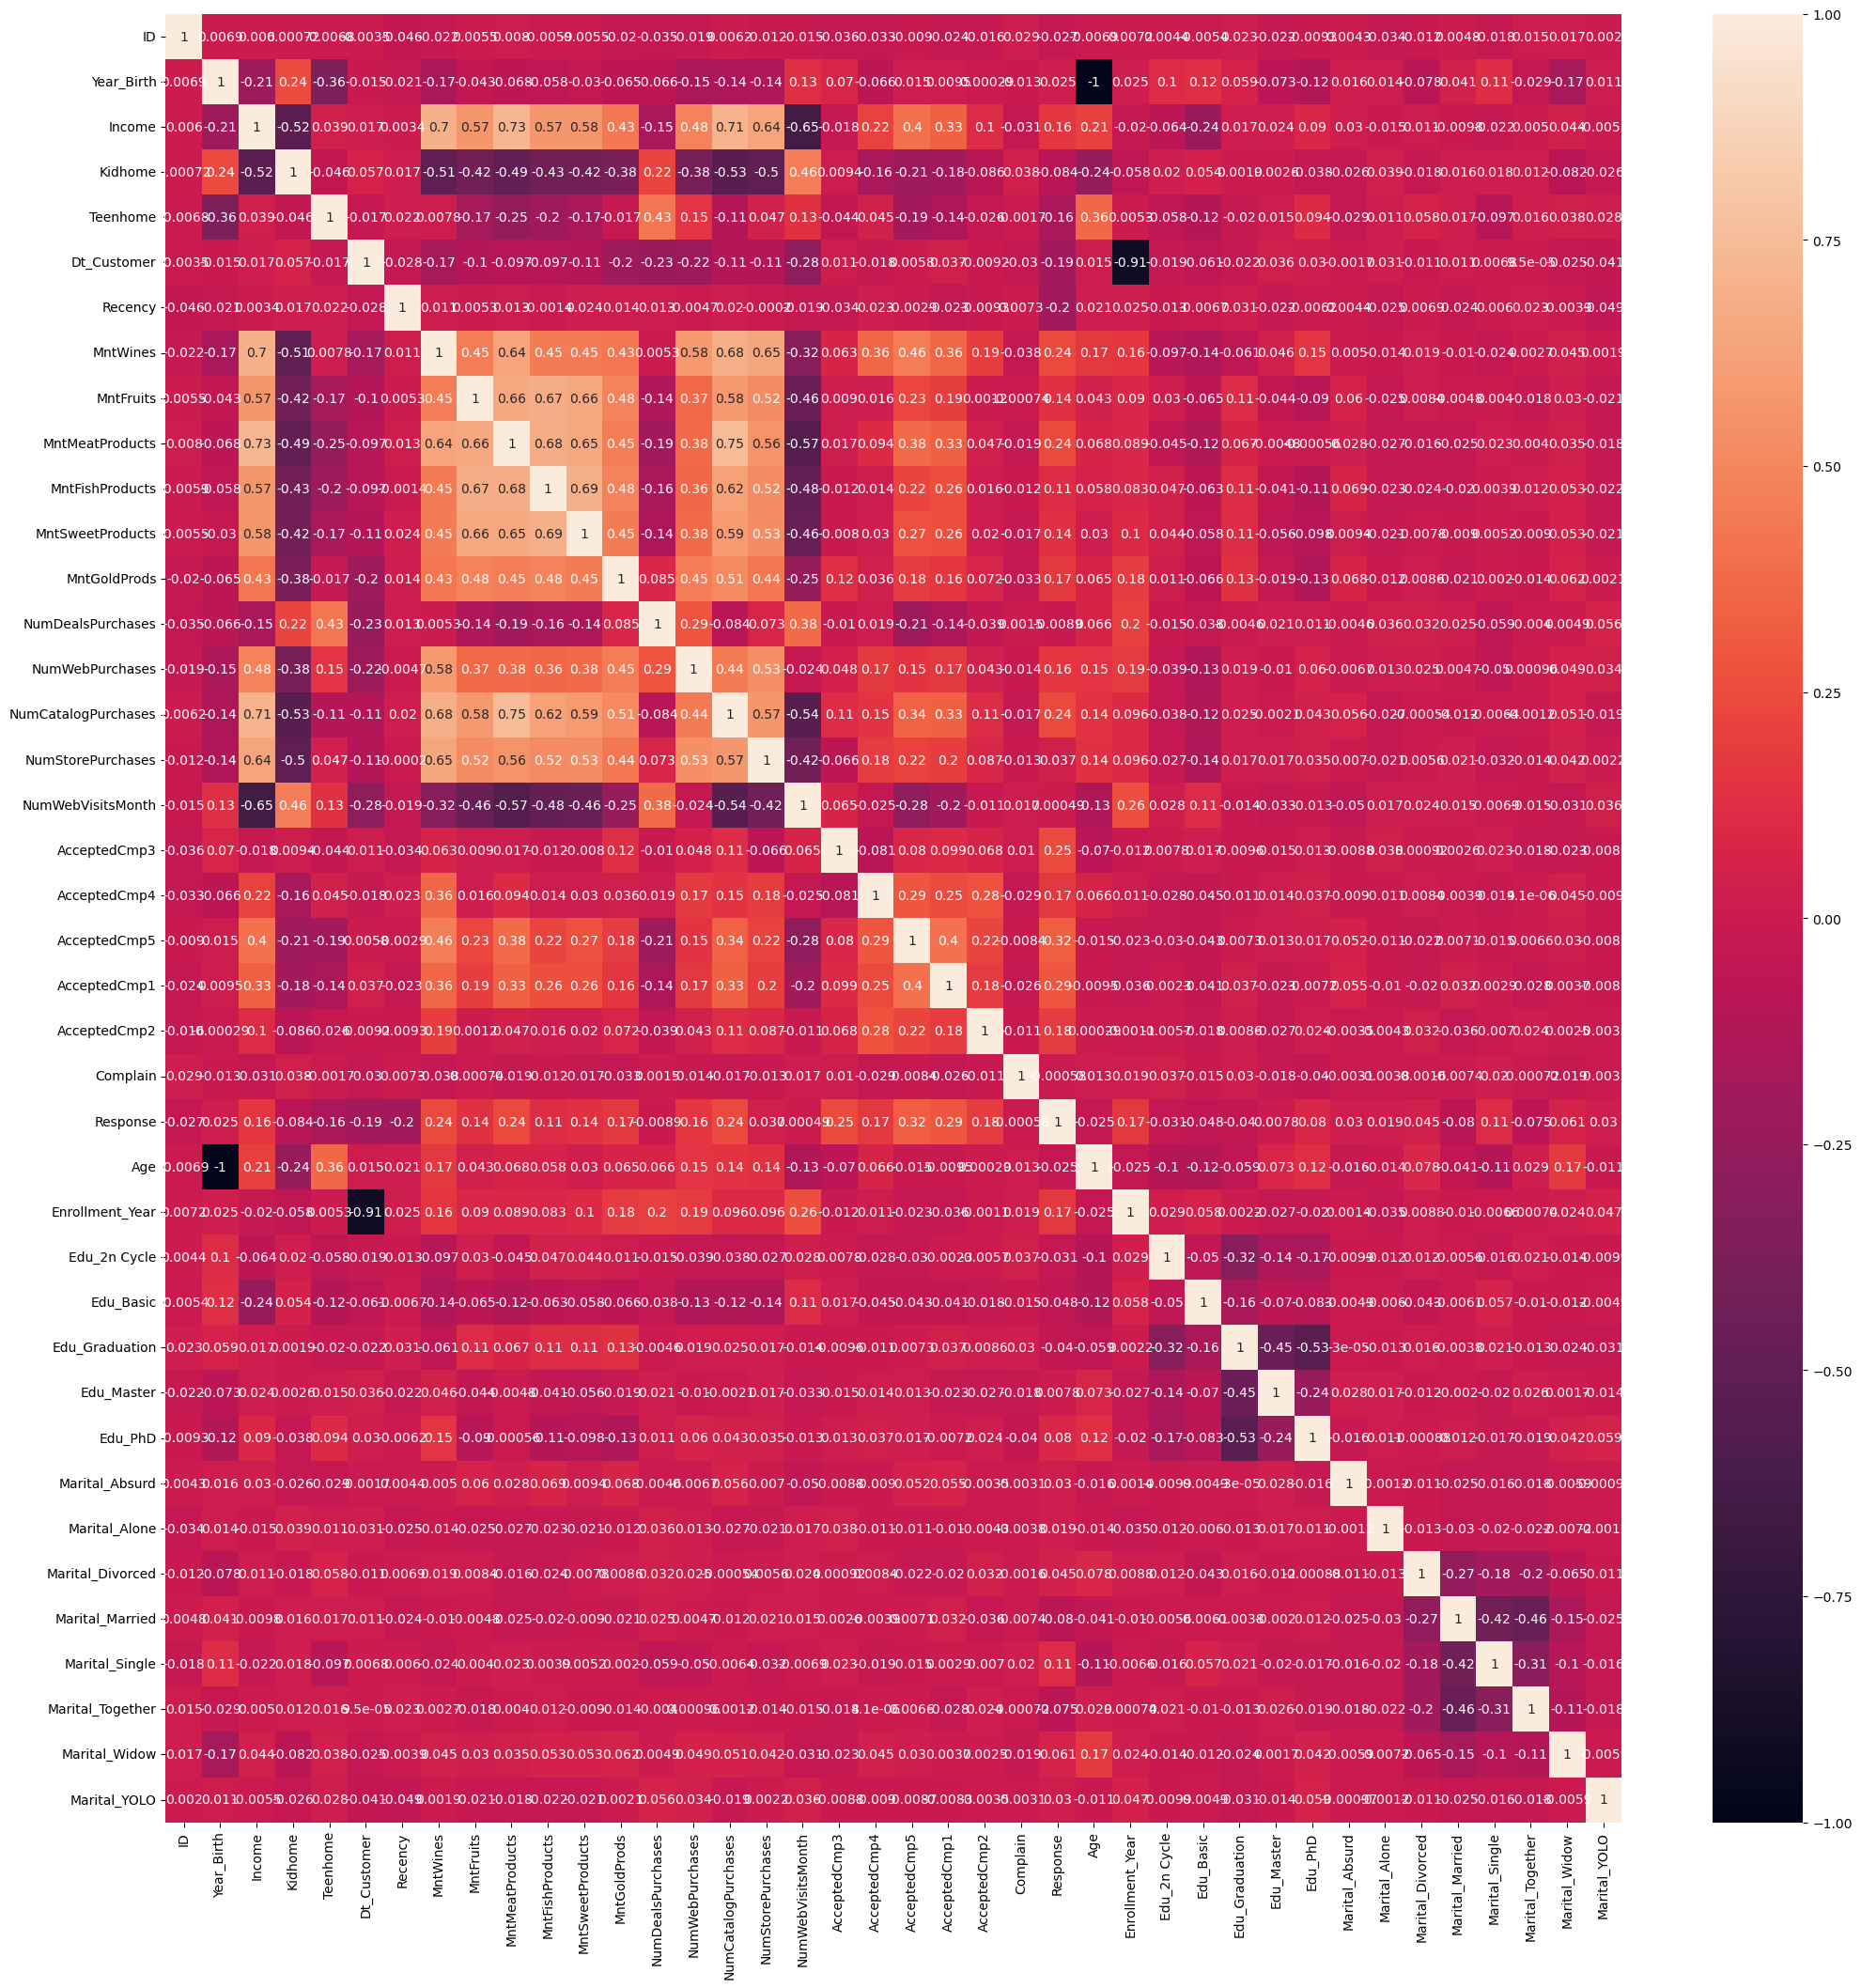

In [74]:
plt.figure(figsize=(25,25))
sns.heatmap(dropped_dt.corr(), annot=True)
plt.show()


In [75]:
drop_columns=['ID','Recency','Complain','Year_Birth']
data.drop(columns=drop_columns,inplace=True)
data.head()


Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
0  Graduation         Single  0.285248        0         0  2012-09-04   
1  Graduation         Single -0.275801        1         1  2014-03-08   
2  Graduation       Together  0.926263        0         0  2013-08-21   
3  Graduation       Together -1.212850        1         0  2014-02-10   
4         PhD        Married  0.292621        1         0  2014-01-19   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  Edu_Master  \
0  1.004720   2.185418         2.216715         2.200534  ...           0   
1 -0.879122  -0.758103        -0.809548        -0.742381  ...           0   
2  0.373754   1.008009        -0.131441         1.964604  ...           0   
3 -0.879122  -0.647721        -0.731089        -0.543703  ...           0   
4 -0.390047   0.787245        -0.181879         0.350347  ...           0   

   Edu_PhD  Marital_Absurd  Marital_Alone  Marital_Divorced  Marital_Married  \
0        0               0              0                 0                0   
1        0               0              0                 0                0   
2        0               0              0                 0                0   
3        0               0              0                 0                0   
4        1               0              0                 0                1   

   Marital_Single  Marital_Together  Marital_Widow  Marital_YOLO  
0               1                 0              0             0  
1               1                 0              0             0  
2               0                 1              0             0  
3               0                 1              0             0  
4               0                 0              0             0  

[5 rows x 38 columns]

# Discretization

In [76]:
def categorize_age(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Young'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 55:
        return 'Middle-Aged'
    else:
        return 'Elderly'


In [77]:
data['Age_Group'] = data['Age'].apply(categorize_age)

In [79]:
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced','Widow'], 'Single')
data['Education'] = data['Education'].replace(['Graduation', 'Master', 'PhD'], 'Higher Education')
data['Education'] = data['Education'].replace(['Basic'],'Basic Education')
data['Education'] = data['Education'].replace(['2nd Cycle'], 'Secondary Education')


In [80]:
data

Education Marital_Status    Income  Kidhome  Teenhome  \
0     Higher Education         Single  0.285248        0         0   
1     Higher Education         Single -0.275801        1         1   
2     Higher Education       Together  0.926263        0         0   
3     Higher Education       Together -1.212850        1         0   
4     Higher Education        Married  0.292621        1         0   
...                ...            ...       ...      ...       ...   
2233  Higher Education       Together  3.116242        1         0   
2235  Higher Education        Married  0.432004        0         1   
2237  Higher Education         Single  0.230208        0         0   
2238  Higher Education       Together  0.813616        0         1   
2239  Higher Education        Married  0.034598        1         1   

     Dt_Customer  MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0     2012-09-04  1.004720   2.185418         2.216715         2.200534  ...   
1     2014-03-08 -0.879122  -0.758103        -0.809548        -0.742381  ...   
2     2013-08-21  0.373754   1.008009        -0.131441         1.964604  ...   
3     2014-02-10 -0.879122  -0.647721        -0.731089        -0.543703  ...   
4     2014-01-19 -0.390047   0.787245        -0.181879         0.350347  ...   
...          ...       ...        ...              ...              ...  ...   
2233  2013-06-02 -0.885159  -0.279781        -0.742298        -0.593373  ...   
2235  2013-06-13  1.228124   0.787245         0.176789         0.251008  ...   
2237  2014-01-25  1.828901   0.971215         0.372936         0.002661  ...   
2238  2014-01-24  0.379792   0.308923         0.356123         1.194728  ...   
2239  2012-10-15 -0.658736  -0.684515        -0.501318        -0.742381  ...   

      Edu_PhD  Marital_Absurd  Marital_Alone  Marital_Divorced  \
0           0               0              0                 0   
1           0               0              0                 0   
2           0               0              0                 0   
3           0               0              0                 0   
4           1               0              0                 0   
...       ...             ...            ...               ...   
2233        0               0              0                 0   
2235        0               0              0                 0   
2237        0               0              0                 1   
2238        0               0              0                 0   
2239        1               0              0                 0   

      Marital_Married  Marital_Single  Marital_Together  Marital_Widow  \
0                   0               1                 0              0   
1                   0               1                 0              0   
2                   0               0                 1              0   
3                   0               0                 1              0   
4                   1               0                 0              0   
...               ...             ...               ...            ...   
2233                0               0                 1              0   
2235                1               0                 0              0   
2237                0               0                 0              0   
2238                0               0                 1              0   
2239                1               0                 0              0   

      Marital_YOLO    Age_Group  
0                0      Elderly  
1                0      Elderly  
2                0      Elderly  
3                0  Middle-Aged  
4                0  Middle-Aged  
...            ...          ...  
2233             0  Middle-Aged  
2235             0      Elderly  
2237             0  Middle-Aged  
2238             0      Elderly  
2239             0      Elderly  

[2058 rows x 39 columns]

In [82]:
data['Children']=data['Kidhome']+data['Teenhome']
data['AcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4']+ data['AcceptedCmp5'] + data['Response']
data['AcceptedCmp'] = np.where(data.AcceptedCmp > 0, 1, 0)
round(data['AcceptedCmp'].value_counts(normalize = True)*100)
data.head()


Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
0  Higher Education         Single  0.285248        0         0  2012-09-04   
1  Higher Education         Single -0.275801        1         1  2014-03-08   
2  Higher Education       Together  0.926263        0         0  2013-08-21   
3  Higher Education       Together -1.212850        1         0  2014-02-10   
4  Higher Education        Married  0.292621        1         0  2014-01-19   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Alone  \
0  1.004720   2.185418         2.216715         2.200534  ...              0   
1 -0.879122  -0.758103        -0.809548        -0.742381  ...              0   
2  0.373754   1.008009        -0.131441         1.964604  ...              0   
3 -0.879122  -0.647721        -0.731089        -0.543703  ...              0   
4 -0.390047   0.787245        -0.181879         0.350347  ...              0   

   Marital_Divorced  Marital_Married  Marital_Single  Marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   Marital_Widow  Marital_YOLO    Age_Group  Children  AcceptedCmp  
0              0             0      Elderly         0            1  
1              0             0      Elderly         2            0  
2              0             0      Elderly         0            0  
3              0             0  Middle-Aged         1            0  
4              0             0  Middle-Aged         1            0  

[5 rows x 41 columns]

# Data Reduction

In [83]:
dummy_age_group = pd.get_dummies(data['Age_Group'], prefix='Age')
dummy_education = pd.get_dummies(data['Education'], prefix='Education')
dummy_marital_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Stat')
data = pd.concat([data, dummy_age_group,dummy_education,dummy_marital_status], axis=1)


In [85]:
data =data.replace({True:1,False:0})

In [86]:
data

Education Marital_Status    Income  Kidhome  Teenhome  \
0     Higher Education         Single  0.285248        0         0   
1     Higher Education         Single -0.275801        1         1   
2     Higher Education       Together  0.926263        0         0   
3     Higher Education       Together -1.212850        1         0   
4     Higher Education        Married  0.292621        1         0   
...                ...            ...       ...      ...       ...   
2233  Higher Education       Together  3.116242        1         0   
2235  Higher Education        Married  0.432004        0         1   
2237  Higher Education         Single  0.230208        0         0   
2238  Higher Education       Together  0.813616        0         1   
2239  Higher Education        Married  0.034598        1         1   

     Dt_Customer  MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0     2012-09-04  1.004720   2.185418         2.216715         2.200534  ...   
1     2014-03-08 -0.879122  -0.758103        -0.809548        -0.742381  ...   
2     2013-08-21  0.373754   1.008009        -0.131441         1.964604  ...   
3     2014-02-10 -0.879122  -0.647721        -0.731089        -0.543703  ...   
4     2014-01-19 -0.390047   0.787245        -0.181879         0.350347  ...   
...          ...       ...        ...              ...              ...  ...   
2233  2013-06-02 -0.885159  -0.279781        -0.742298        -0.593373  ...   
2235  2013-06-13  1.228124   0.787245         0.176789         0.251008  ...   
2237  2014-01-25  1.828901   0.971215         0.372936         0.002661  ...   
2238  2014-01-24  0.379792   0.308923         0.356123         1.194728  ...   
2239  2012-10-15 -0.658736  -0.684515        -0.501318        -0.742381  ...   

      Age_Young Adult  Education_2n Cycle  Education_Basic Education  \
0                   0                   0                          0   
1                   0                   0                          0   
2                   0                   0                          0   
3                   0                   0                          0   
4                   0                   0                          0   
...               ...                 ...                        ...   
2233                0                   0                          0   
2235                0                   0                          0   
2237                0                   0                          0   
2238                0                   0                          0   
2239                0                   0                          0   

      Education_Higher Education  Marital_Stat_Absurd  Marital_Stat_Alone  \
0                              1                    0                   0   
1                              1                    0                   0   
2                              1                    0                   0   
3                              1                    0                   0   
4                              1                    0                   0   
...                          ...                  ...                 ...   
2233                           1                    0                   0   
2235                           1                    0                   0   
2237                           1                    0                   0   
2238                           1                    0                   0   
2239                           1                    0                   0   

      Marital_Stat_Married  Marital_Stat_Single  Marital_Stat_Together  \
0                        0                    1                      0   
1                        0                    1                      0   
2                        0                    0                      1   
3                        0                    0                      1   
4                        1                    0    

In [103]:
data_copy=data.copy()
droppedd_dt=data_copy.drop(['Education','Marital_Status','Age_Group'],axis=1)

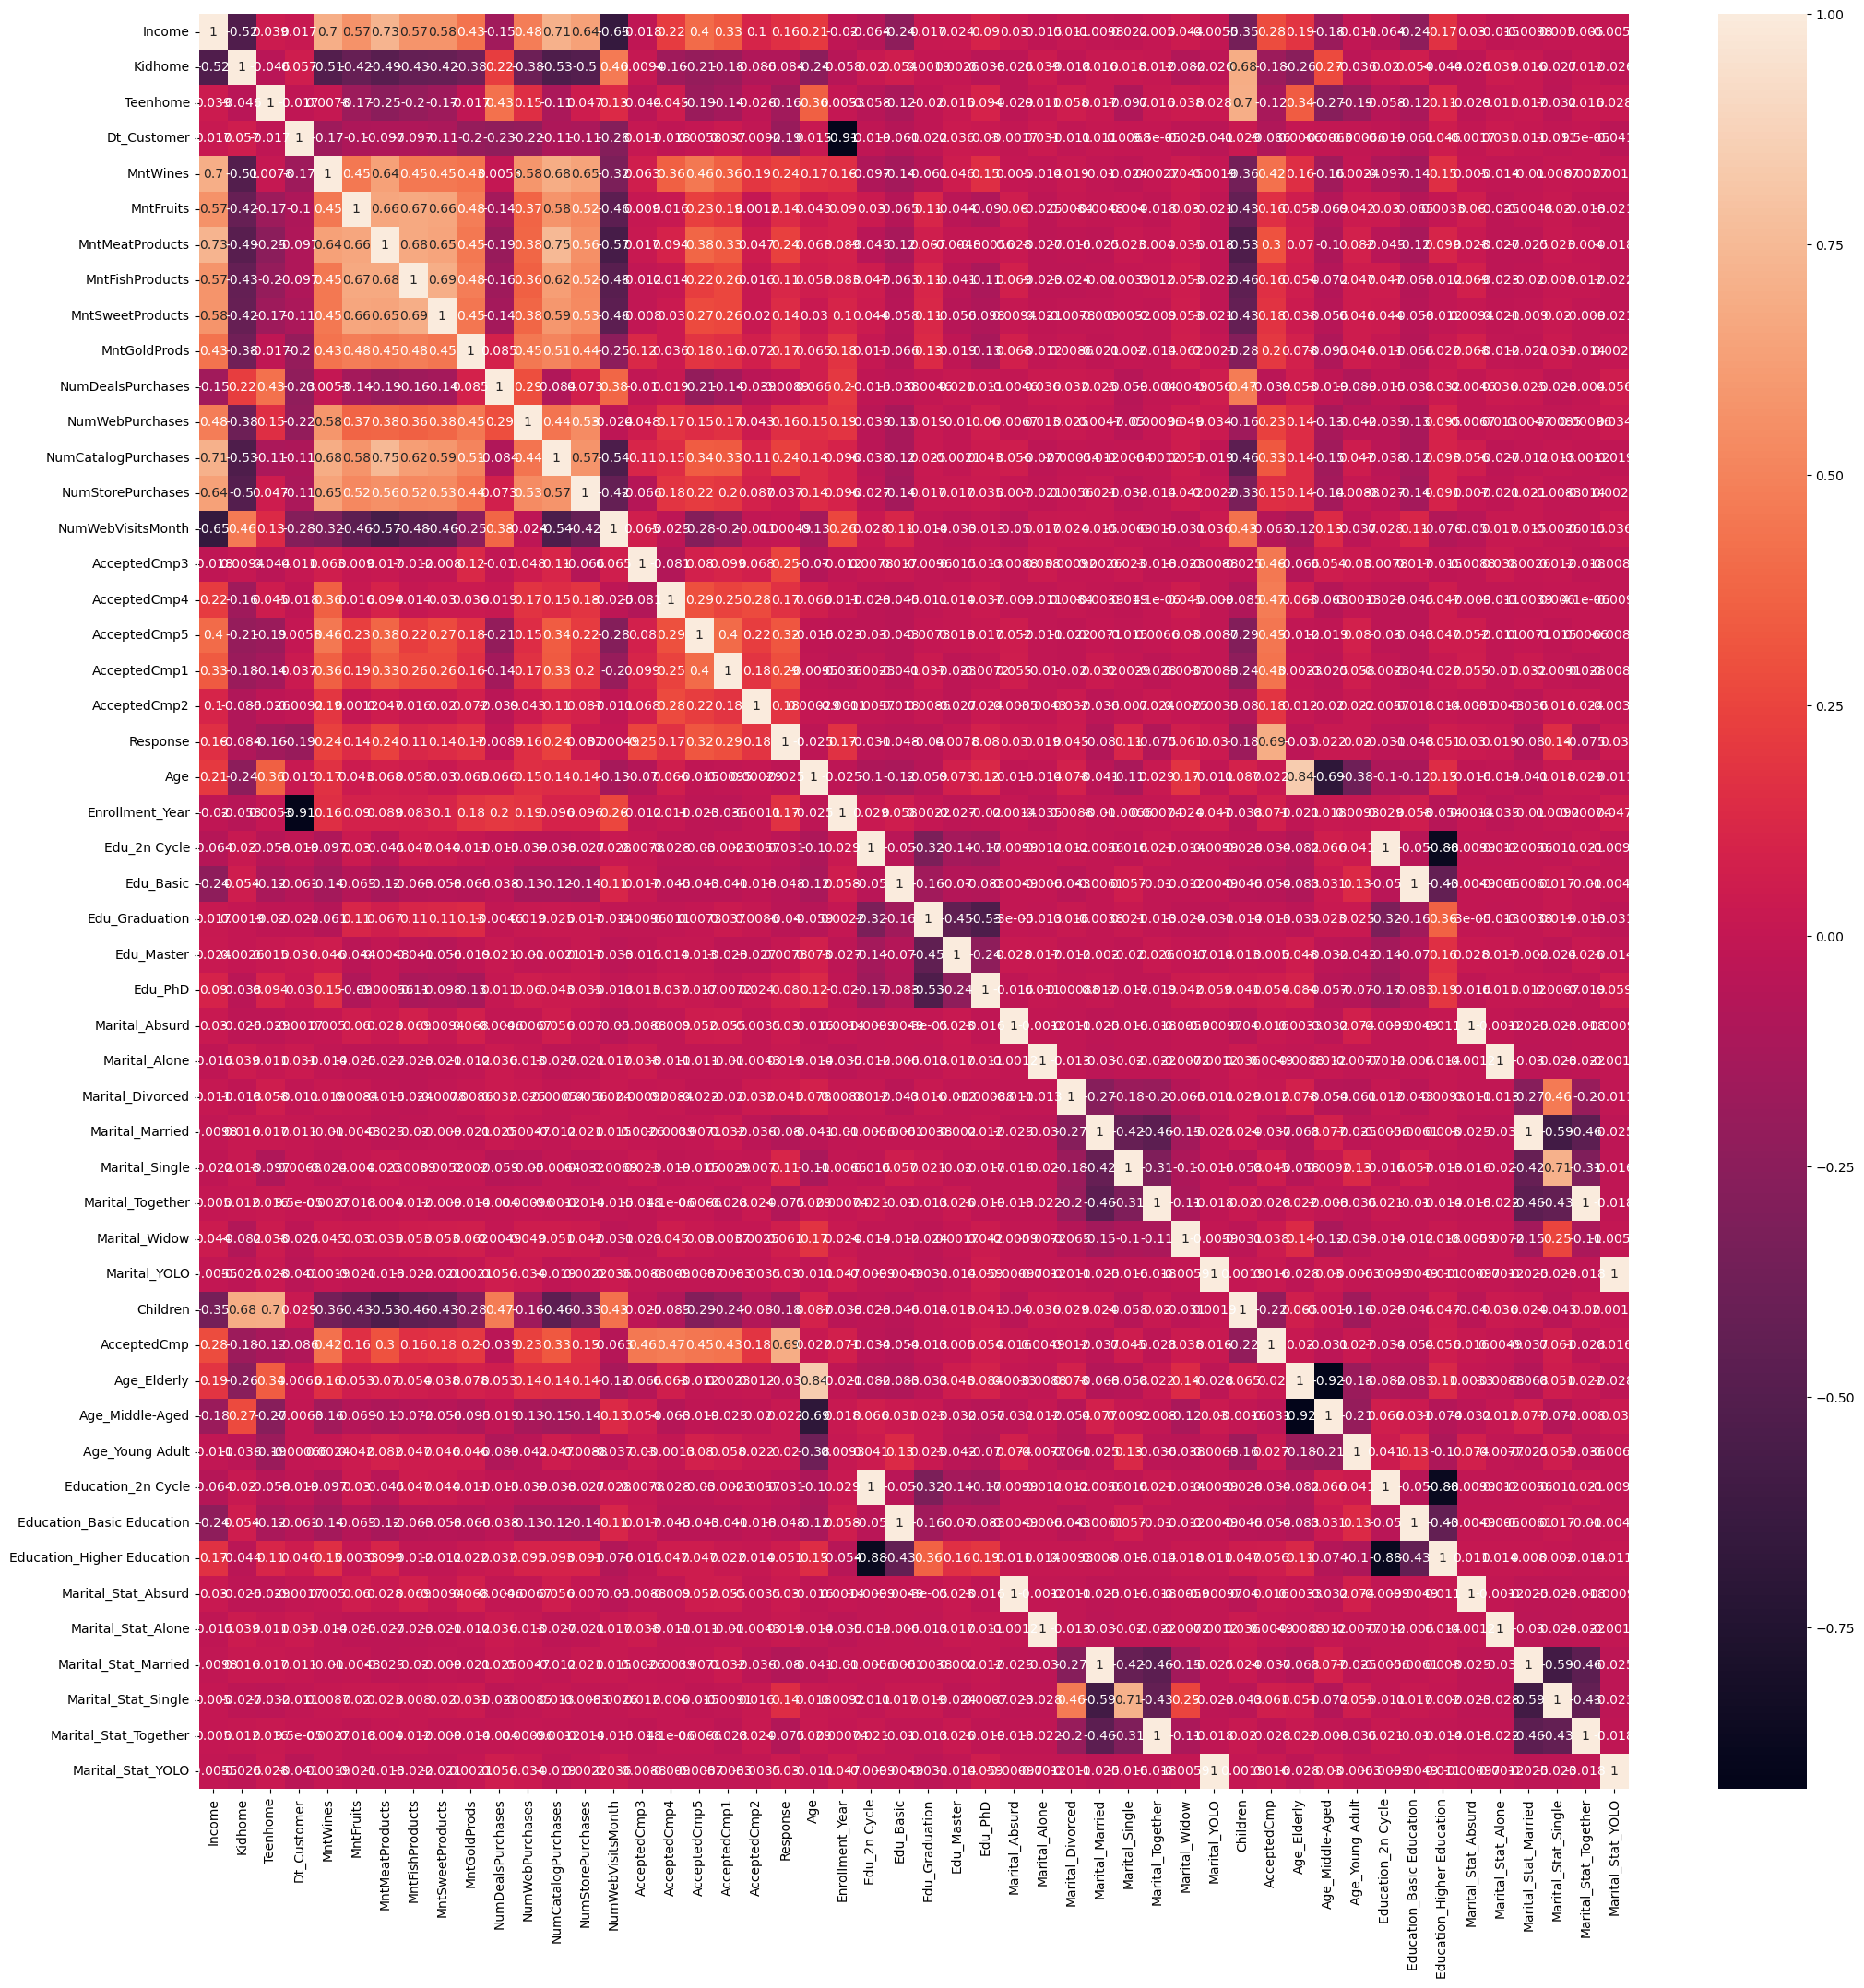

In [106]:
plt.figure(figsize=(25,25))
sns.heatmap(droppedd_dt.corr(), annot=True)
plt.show()


In [108]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Age', 'Enrollment_Year', 'Edu_2n Cycle', 'Edu_Basic',
       'Edu_Graduation', 'Edu_Master', 'Edu_PhD', 'Marital_Absurd',
       'Marital_Alone', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single', 'Marital_Together', 'Marital_Widow', 'Marital_YOLO',
       'Age_Group', 'Children', 'AcceptedCmp', 'Age_Elderly',
       'Age_Middle-Aged', 'Age_Young Adult', 'Education_2n Cycle',
       'Education_Basic Education', 'Education_Higher Education',
       'Marital_Stat_Absurd', 'Marital_Stat_Alone', 'Marital_Stat_Married',
       'Marital_Stat_Single', 'Marital_St

In [112]:
droppedd_dt.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Age', 'Enrollment_Year', 'Edu_2n Cycle',
       'Edu_Basic', 'Edu_Graduation', 'Edu_Master', 'Edu_PhD',
       'Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO', 'Children', 'AcceptedCmp',
       'Age_Elderly', 'Age_Middle-Aged', 'Age_Young Adult',
       'Education_2n Cycle', 'Education_Basic Education',
       'Education_Higher Education', 'Marital_Stat_Absurd',
       'Marital_Stat_Alone', 'Marital_Stat_Married', 'Marital_Stat_Single',
       'Marital_Stat_Together', 'Marital_Stat_YOLO'],
      dt

In [120]:
selected_columns =['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth', 'Enrollment_Year', 'Children', 'AcceptedCmp','Age_Middle-Aged', 'Age_Young Adult','Education_Basic Education','Education_Higher Education','Marital_Stat_Married', 'Marital_Stat_Single', 'Marital_Stat_Together']
selected_df = data[selected_columns]


In [121]:
selected_df

Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     0.285248  1.004720   2.185418         2.216715         2.200534   
1    -0.275801 -0.879122  -0.758103        -0.809548        -0.742381   
2     0.926263  0.373754   1.008009        -0.131441         1.964604   
3    -1.212850 -0.879122  -0.647721        -0.731089        -0.543703   
4     0.292621 -0.390047   0.787245        -0.181879         0.350347   
...        ...       ...        ...              ...              ...   
2233  3.116242 -0.885159  -0.279781        -0.742298        -0.593373   
2235  0.432004  1.228124   0.787245         0.176789         0.251008   
2237  0.230208  1.828901   0.971215         0.372936         0.002661   
2238  0.813616  0.379792   0.308923         0.356123         1.194728   
2239  0.034598 -0.658736  -0.684515        -0.501318        -0.742381   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             2.172280      1.220624           0.501951         1.479459   
1            -0.754132     -0.837081          -0.147744        -1.157320   
2            -0.039283      0.066301          -0.797440         1.479459   
3            -0.682647     -0.862175          -0.147744        -0.780637   
4             0.175171     -0.611236           1.801342         0.349411   
...                ...           ...                ...              ...   
2233         -0.754132     -0.686518           1.151647        -0.403955   
2235          2.172280      2.186742          -0.147744         1.856141   
2237         -0.360965     -0.385390          -0.797440        -0.780637   
2238          0.282399      0.543087          -0.147744         0.726093   
2239         -0.754132     -0.460672           0.501951        -0.403955   

      NumCatalogPurchases  ...  Enrollment_Year  Children  AcceptedCmp  \
0                2.703573  ...         1.504963         0            1   
1               -0.593476  ...        -1.412808         2            0   
2               -0.227137  ...         0.046078         0            0   
3               -0.959815  ...        -1.412808         1            0   
4                0.139202  ...        -1.412808         1            0   
...                   ...  ...              ...       ...          ...   
2233            -0.593476  ...         0.046078         1            0   
2235             0.139202  ...         0.046078         1            0   
2237             0.139202  ...        -1.412808         0            1   
2238             0.871879  ...        -1.412808         1            0   
2239            -0.593476  ...         1.504963         2            1   

      Age_Middle-Aged  Age_Young Adult  Education_Basic Education  \
0                   0                0                          0   
1                   0                0                          0   
2                   0                0                          0   
3                   1                0                          0   
4                   1                0                          0   
...               ...              ...                        ...   
2233                1                0                          0   
2235                0                0                          0   
2237                1                0                          0   
2238                0                0                          0   
2239                0                0                          0   

      Education_Higher Education  Marital_Stat_Married  Marital_Stat_Single  \
0                              1                     0                    1   
1                              1                     0                    1   
2                              1                     0                    0   
3                              1                     0                    0   
4                              1                     1                    0   
...                       

In [122]:
plt.figure(figsize=(25,25))
sns.heatmap(selected_df.corr(), annot=True)
plt.show()

# Dimensionality Reduction -PCA

In [124]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA(n_components=3)
pca.fit(selected_df)
PCA_ds = pd.DataFrame(pca.transform(selected_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T


count          mean       std       min       25%       50%       75%  \
col1  2058.0 -2.934700e-17  2.559532 -4.620223 -2.367884 -0.664775  2.351316   
col2  2058.0 -1.726294e-18  1.368476 -3.789558 -0.988579 -0.195572  0.837213   
col3  2058.0  6.732548e-17  1.004992 -3.032394 -0.690489  0.001012  0.700452   

           max  
col1  6.253032  
col2  4.332540  
col3  3.211843

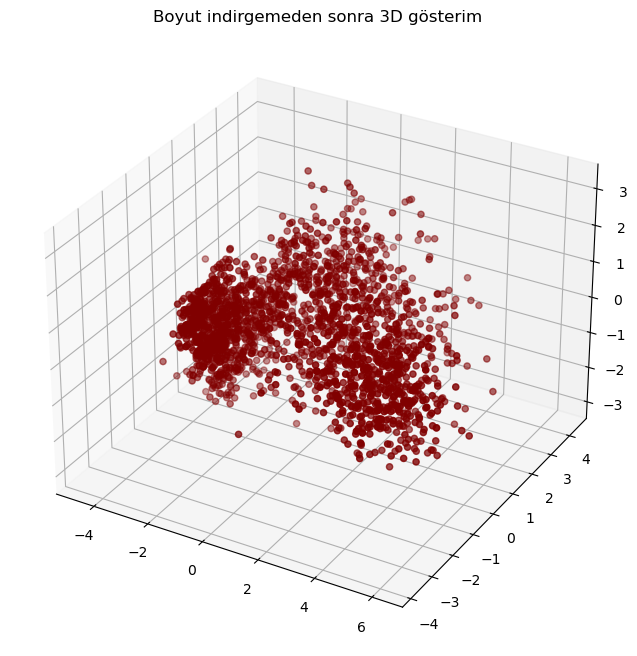

In [129]:
x=PCA_ds["col1"]
y=PCA_ds["col2"]
z=PCA_ds["col3"]
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Boyut indirgemeden sonra 3D gösterim")
plt.show()
